In [24]:
import numpy as np
from numpy import ndarray
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [35]:
df = pd.read_csv("mnist.csv", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [36]:
X = df.drop(columns = [784])
y = df[784]

In [98]:
X.shape, len(X)

((10000, 784), 10000)

In [89]:
# def read_image(image_path):
#     with open(image_path) as f_obj:
#         data = f_obj.readlines()

#     metadata = list(map(lambda x: x.strip(), data[:4]))
#     img_data = list(map(lambda x: int(x.strip()), data[4:]))
    
#     img_width, img_height = map(int, metadata[2].split(" "))
    
#     return np.array(img_data).reshape((img_height, img_width))

# img_arr = read_image("alan.pgm")

In [99]:
img_arr = X.iloc[np.random.randint(len(X))].values
img_arr = img_arr.reshape((28, 28))

In [100]:
img_arr.shape

(28, 28)

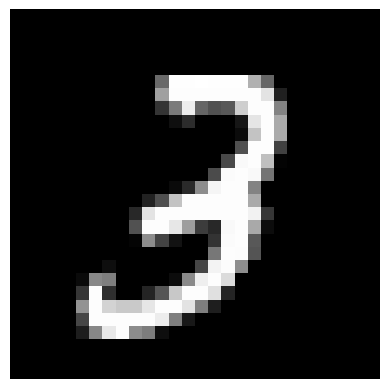

In [101]:
plt.imshow(img_arr, cmap="gray")
plt.axis("off")
plt.show()

In [59]:
def pad_2d(image_arr: ndarray, kernel_size):
    N, M = image_arr.shape
    m, n = kernel_size
    
    n_rows = int((m - 1) / 2)
    n_cols = int((n - 1) / 2)
    
    # add top and bottom padding
    top_bottom_zeros = np.zeros((n_rows, M))
    image_arr = np.vstack([top_bottom_zeros, image_arr, top_bottom_zeros])
    
    # add left and right padding
    left_bottom_zeros = np.zeros((N + n_rows * 2, n_cols)) # (m - 1) rows need to be added
    image_arr = np.hstack([left_bottom_zeros, image_arr, left_bottom_zeros])
    
    image_arr = image_arr.astype('uint64')
    
    return image_arr

In [60]:
def inner_product(a: ndarray, b: ndarray):
    return np.sum(a * b)

In [61]:
def conv_2d(inp: ndarray, kernel: ndarray) -> ndarray:
    
    # pad the image
    inp_pad = pad_2d(inp, kernel.shape)
    
    # initialize the output
    out = np.zeros_like(inp)
    
    # flip the kernel horizontally and vertically
    kernel = np.flipud(np.fliplr(kernel))
    
    # convolution process
    for i in tqdm(range(inp_pad.shape[0] - kernel.shape[0] + 1)):
        for j in range(inp_pad.shape[1] - kernel.shape[1] + 1):
            sub_arr = inp_pad[i:i + kernel.shape[0], j:j + kernel.shape[1]]
            out[i, j] = inner_product(sub_arr, kernel)
    
    return out

In [102]:
def show_image(inp: ndarray):
    plt.imshow(inp, cmap="gray")
    plt.axis("off")
    plt.show()

--- 
# Filters

## 1. Sobel

In [74]:
sobel_y = np.array([
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1],
])

sobel_x = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1],
])

100%|█████████████████████████████████████████████████████████████████████████████████| 28/28 [00:00<00:00, 495.18it/s]


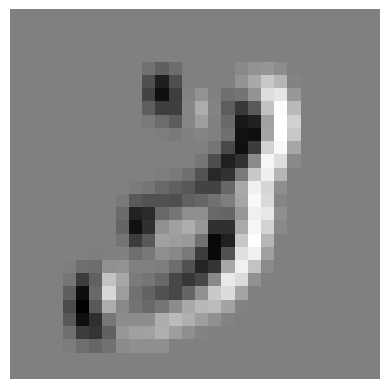

In [103]:
g_x = conv_2d(img_arr, sobel_x)

show_image(g_x)

100%|█████████████████████████████████████████████████████████████████████████████████| 28/28 [00:00<00:00, 482.78it/s]


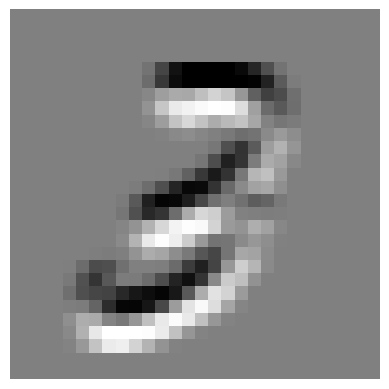

In [104]:
g_y = conv_2d(img_arr, sobel_y)

show_image(g_y)

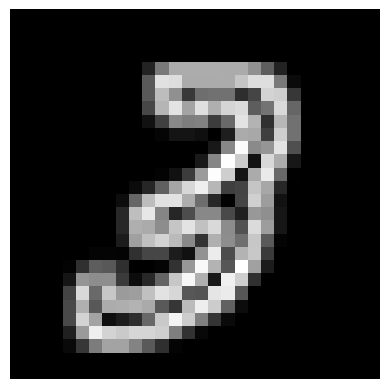

In [105]:
M = np.abs(g_x) + np.abs(g_y)

show_image(M)

## 2. Prewitt

In [106]:
prewitt_y = np.array([
    [-1, -1, -1],
    [0, 0, 0],
    [1, 1, 1],
])

prewitt_x = np.array([
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1],
])

100%|█████████████████████████████████████████████████████████████████████████████████| 28/28 [00:00<00:00, 474.57it/s]


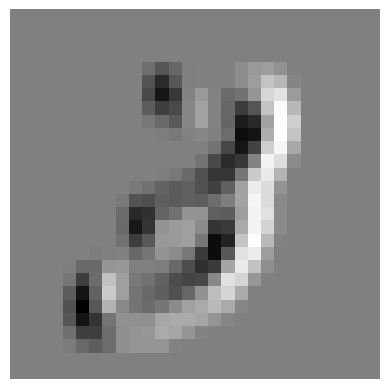

In [112]:
g_x = conv_2d(img_arr, prewitt_x)

show_image(g_x)

100%|█████████████████████████████████████████████████████████████████████████████████| 28/28 [00:00<00:00, 437.60it/s]


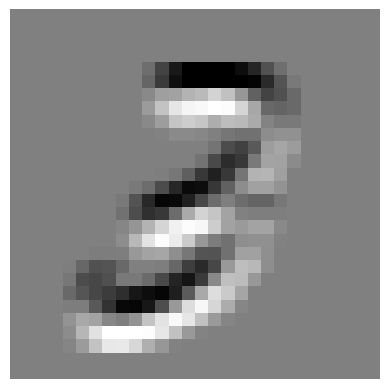

In [113]:
g_y = conv_2d(img_arr, prewitt_y)

show_image(g_y)

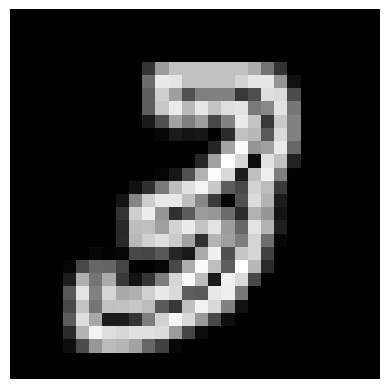

In [114]:
M = np.abs(g_x) + np.abs(g_y)

show_image(M)

In [116]:
g_x.shape

(28, 28)

100%|█████████████████████████████████████████████████████████████████████████████████| 28/28 [00:00<00:00, 509.25it/s]


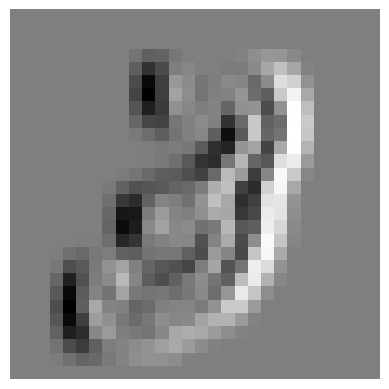

In [122]:
g_x = conv_2d(M, prewitt_x)
show_image(g_x)

100%|█████████████████████████████████████████████████████████████████████████████████| 28/28 [00:00<00:00, 482.95it/s]


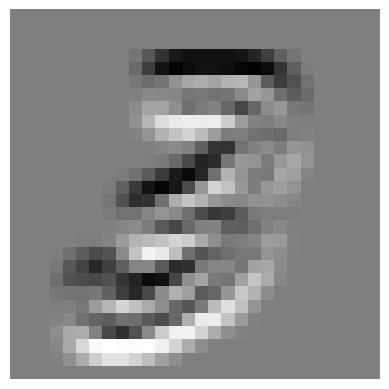

In [123]:
g_y = conv_2d(M, prewitt_y)
show_image(g_y)

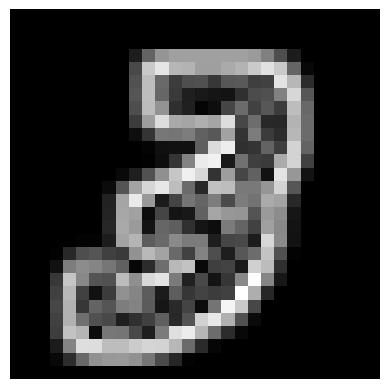

In [124]:
M = np.abs(g_x) + np.abs(g_y)
show_image(M)

In [127]:
from tabulate import tabulate

In [130]:
print(tabulate(M, tablefmt="simple"))

-  -  -  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  -  -  -  -  -
0  0  0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0  0  0  0  0  0
0  0  0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0  0  0  0  0  0
0  0  0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0  0  0  0  0  0
0  0  0     0     0     0     0     0     0   424  1440  2138  2290  2290  2291  2290  2290  2286  2209  1826  1116   408     0  0  0  0  0  0
0  0  0     0     0     0     0     0     0  1064  2880  3284  2597  2573  2279  2279  2429  2581  2889  3214  2868  1448   128  0  0  0  0  0
0  0  0     0     0     0     0     0     0  1170  2710  1514   876  1117  1147   786  1252  1290   911   953  3265  2618   656  0  0  0  0  0